In [83]:
import pandas as pd

data = pd.read_csv('datasets/projects.csv')
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [84]:
change = {
    0: 1,
    1: 0
}
data['finished'] = data.unfinished.map(change)
data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


`tail` faz a mesma coisa que `head`, só que com as últimas linhas.

In [85]:
data.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [86]:
data = data[['finished', 'expected_hours', 'price']]

In [87]:
data.head()

,finished,expected_hours,price
0,0,26,192
1,0,88,9015
2,0,89,2577
3,0,42,275
4,0,39,170


Gráfico de dispersão

<AxesSubplot: xlabel='expected_hours', ylabel='price'>

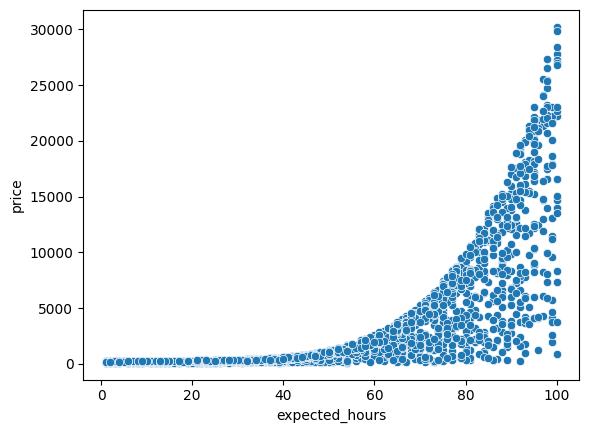

In [88]:
import seaborn as sns

sns.scatterplot(x="expected_hours", y="price", data=data)

`hue` atribui uma cor de destaque para a coluna setada.

<AxesSubplot: xlabel='expected_hours', ylabel='price'>

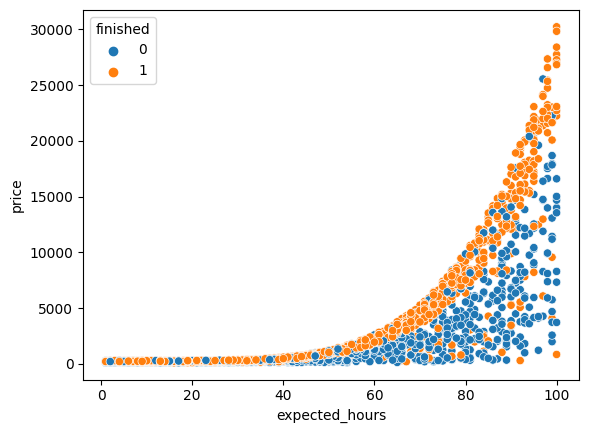

In [89]:
sns.scatterplot(x="expected_hours", y="price", data=data, hue="finished")

`col` é a coluna referência na divisão dos gráficos. Será gerado um gráfico para cada valor nesta coluna.

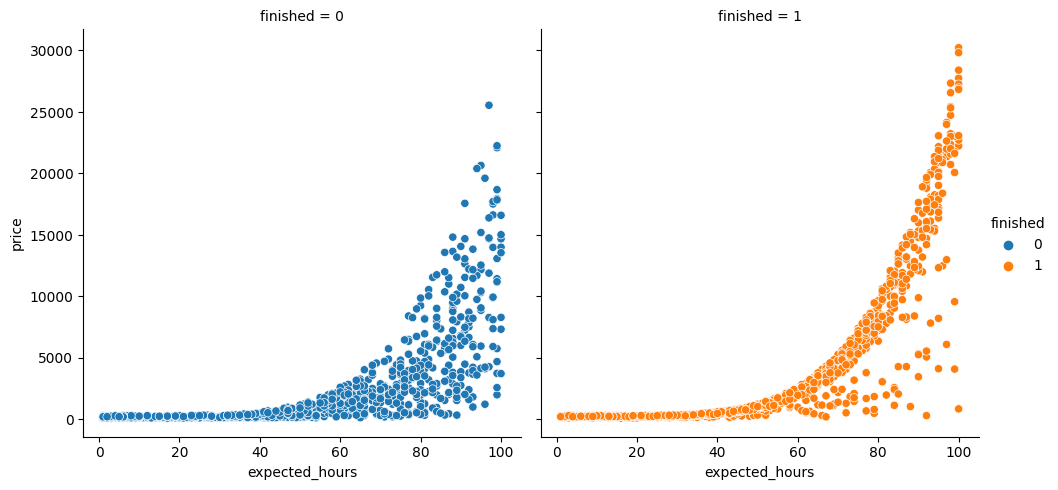

In [90]:
sns.relplot(x="expected_hours", y="price", data=data, col="finished", hue="finished")

In [91]:
x = data[['expected_hours', 'price']]
y = data['finished']

In [92]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 5
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=SEED, stratify = y)
print('Treino x: %d\nTeste x: %d\n\nTreino y: %d\nTeste y: %d' % (len(train_x), len(test_x), len(train_y), len(test_y)))

model = LinearSVC()
model.fit(train_x, train_y)
predicts = model.predict(test_x)
accuracy = accuracy_score(test_y, predicts)
print('A acurácia foi de %.2f%%' % (accuracy * 100))

Treino x: 1617
Teste x: 540

Treino y: 1617
Teste y: 540
A acurácia foi de 54.07%


/home/weverton/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Aqui é criado um dummy manual para testar o quão melhor é a acurácia do nosso modelo.

In [93]:
predicts_baseline = np.ones(540)
accuracy = accuracy_score(test_y, predicts_baseline)
print('A acurácia do algoritmo de baseline foi de %.2f%%' % (accuracy * 100))

A acurácia do algoritmo de baseline foi de 52.59%


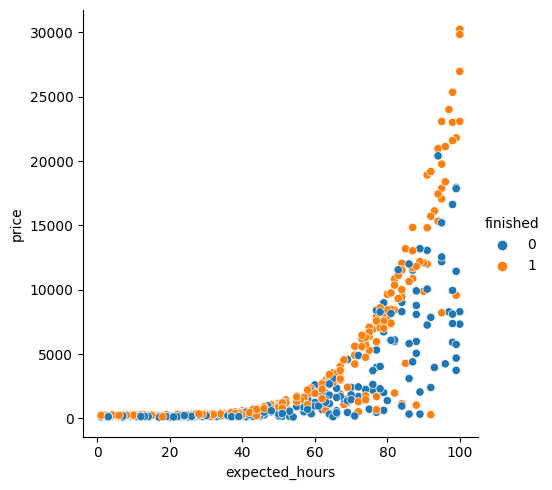

In [94]:
sns.relplot(x="expected_hours", y="price", data=test_x, hue=test_y)

Para poder usar o gráfico `plt.scatter` será preciso escalar os eixos, é isto que é feito nas sequências abaixo.

In [95]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()

y_min = test_x.price.min()
y_max = test_x.price.max()

print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [96]:
pixels = 100
axis_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axis_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [97]:
xx, yy = np.meshgrid(axis_x, axis_y)
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [98]:
Z = model.predict(points)
Z = Z.reshape(xx.shape)
Z

/home/weverton/.local/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

Este gráfico traça a probabilidade da precisão do modelo em prever a classe correta para as amostras do teste. Na região com a cor de fundo em maior destaque, ele tende a ter uma precisão melhor, enquanto na área com o alpha em 0.3, é a área em que que ele tende a ser mais impreciso, já a linha que divide as áreas, é a borda de decisão.

A borda de decisão exibida no gráfico é chamada de `decision boundary`.

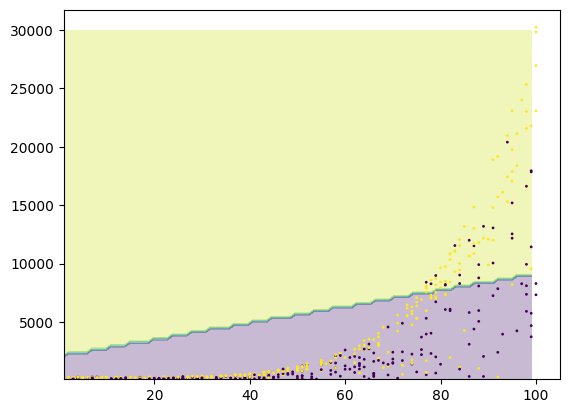

In [99]:
import matplotlib.pylab as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)

# Usando SVC

In [108]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 5
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=SEED, stratify = y)
print('Treino x: %d\nTeste x: %d\n\nTreino y: %d\nTeste y: %d' % (len(train_x), len(test_x), len(train_y), len(test_y)))

model = SVC(gamma='auto')
model.fit(train_x, train_y)
predicts = model.predict(test_x)
accuracy = accuracy_score(test_y, predicts)
print('A acurácia foi de %.2f%%' % (accuracy * 100))

Treino x: 1617
Teste x: 540

Treino y: 1617
Teste y: 540
A acurácia foi de 59.07%


In [111]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()

y_min = test_x.price.min()
y_max = test_x.price.max()

pixels = 100
axis_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axis_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(axis_x, axis_y)
points = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(points)
Z = Z.reshape(xx.shape)
Z

/home/weverton/.local/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

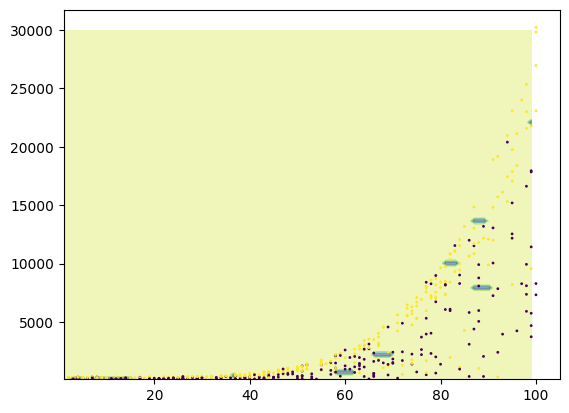

In [112]:
import matplotlib.pylab as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)

## Usando o escalador do SKLearn

`StandardScaler` Pardroniza as `features` e escala para as variações de unidade.

In [115]:
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 5
np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=SEED, stratify = y)
print('Treino x: %d\nTeste x: %d\n\nTreino y: %d\nTeste y: %d' % (len(train_x), len(test_x), len(train_y), len(test_y)))

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC(gamma='auto')
model.fit(train_x, train_y)
predicts = model.predict(test_x)
accuracy = accuracy_score(test_y, predicts)
print('A acurácia foi de %.2f%%' % (accuracy * 100))

Treino x: 1617
Teste x: 540

Treino y: 1617
Teste y: 540
A acurácia foi de 66.85%


`pixels` são a quantidade de pixels usados para plotar o gráfico.

`np.arange` Cria um array com os valores equidistantes, sendo o primeiro argumento o valor inicial, o segundo o valor final e o último o salto entre cada valor.

`np.meshgrid` gera uma grade de coordenadas.

`array.ravel` Converte um array bidimensional para um unidimensional.

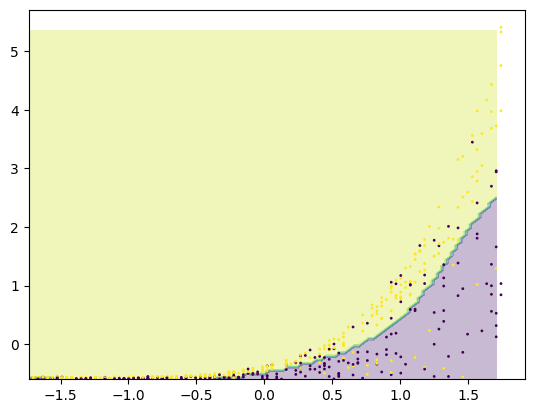

In [117]:
data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

pixels = 100
axis_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axis_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(axis_x, axis_y)
points = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(points)
Z = Z.reshape(xx.shape)
Z

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)